In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression

In this lab, we are going to implement a Linear Regression model "by hand" and also use sklearn to implement linear regressors using different basis functions, and then add regularization to the models.



## Part 1 - Synthetic and real datasets

* Generate 50 points in a line in the interval $[0, 10]$ for `x`, perturbed by a small gaussian noise. For example, `y = 2 * x + 5 + noise` where `noise` is taken from a normal distribution.
* plot the generated data as a scatter plot, and the line without noise as a reference

*Note:* If you want to generate the same data as I generated, use $y = 3x + 5 + \epsilon$ after setting the random seed to 0

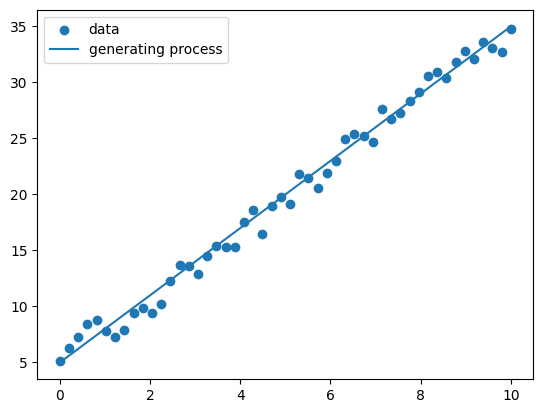

In [272]:
# your code here

# Vetor x uniforme
x = np.linspace(0,10,50)
# Vetor de ruído
noise = np.random.normal(size = 50)
# Vetores y com e sem ruído
y = 3*x + 5 + noise
y_line = 3*x + 5

# Plotando os dados
plt.scatter(x, y, label = "data")
plt.plot(x, y_line, label = "generating process")
plt.legend()

plt.show()

### Load the housing dataset

For this lab we will be using the raw version of the Housing dataset that you used for the first coursework.

**Housing.txt:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

In [273]:
housing_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing = pd.read_table("housing.csv", names=housing_names, sep=',')
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.0,0.16551443847757338,0.06781524926686218,0.0,0.273695830477041,0.4558446556550128,0.49567539105883546,0.23838925398768368,0.0,0.18897873782313399,0.2524957633267373,0.6931471805599452,0.08588399412377948,3.2188758248682006
2,0.00023589471383251288,0.0,0.2423020527859238,0.0,0.15942773692810197,0.4369622898362954,0.5781280868848844,0.2993353931326901,0.04255961441879593,0.09981079325195306,0.44031183943833263,0.6931471805599452,0.18603980111083265,3.1179499062782403
3,0.0002356699716511248,0.0,0.2423020527859238,0.0,0.15942773692810197,0.5273203729323218,0.46961735485736217,0.2993353931326901,0.04255961441879593,0.09981079325195306,0.44031183943833263,0.6880025966109696,0.06153318181144175,3.5751506887855933
4,0.00029275286287910716,0.0,0.06304985337243403,0.0,0.13994084925460543,0.5059469094428497,0.36590104731202505,0.3705593212114958,0.08338160893905106,0.06465778883405697,0.5001303346492426,0.6902811074512862,0.032843228788449905,3.5380565643793527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.0006327106197177769,0.0,0.42045454545454547,0.0,0.32702148701181316,0.45802859246093003,0.5198476246791401,0.11571060925114904,0.0,0.15196727284631473,0.6384887680220813,0.6869375122545108,0.19810871681719253,3.152736022363656
503,0.00043769280743545676,0.0,0.42045454545454547,0.0,0.32702148701181316,0.39899342307227936,0.565337214824266,0.10011073860026859,0.0,0.15196727284631473,0.6384887680220813,0.6931471805599452,0.18466428507552266,3.0726933146901194
504,0.0006117053443038648,0.0,0.42045454545454547,0.0,0.32702148701181316,0.5034020844720096,0.6456949469147998,0.0901890380016797,0.0,0.15196727284631473,0.6384887680220813,0.6931471805599452,0.1024589592179921,3.214867803470662
505,0.0011600567748273284,0.0,0.42045454545454547,0.0,0.32702148701181316,0.482097287092534,0.6364732921973457,0.10841851650460242,0.0,0.15196727284631473,0.6384887680220813,0.6887880032892966,0.12316465334146762,3.1354942159291497


## Part 2 -- Build Linear Regression Models

You will need to implement it twice:

1. using the Normal Equations seen in class (Moore-Penrose pseudo-inverse)
2. using stochastic gradient descent

* **Tip 1:** When you implement the stochastic gradient version it will be crucial to plot the sum of squares error as a function of the iteration
* **Tip 2:** You will need to initialize the weights. Start by choosing them randomly, Gaussian distributed, with a very small variance...

Run some experiments with your stochastic gradient descent version, and think about these questions: 
* what happens with different values of the step parameter? 
* Does the system always converge to the same solution? 
* Are you getting the same solution that you get with the closed form implementation? 
* What happens if you initialize your weights to values that are too big?

Below, I provide some skeletons for your implementations, but feel free to structure your code differently.

Remember to:
* Separate the datasets into training and testing (I used 60% for training)


In [274]:
def linear_regression_PI(X, y):
    """
    Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    
    Returns
    -------
    w : array
        Learnt parameters
        
    Notes
    -----
    The first column of w corresponds to the bias (`w_0`)
    """
    # Calculando a pseudo-inversa da matriz de dados (já com a coluna referente ao bias)
    pseudo_inverse = np.linalg.inv(X.T @ X) @ X.T
    # Encontrando o vetor w
    w = pseudo_inverse @ y

    return w


def linear_regression_SGD(X, y, lr, max_iter=10):
    """
    Implements a Linear Regression model using Stochastic Gradient Descent
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    lr : float
        Learning rate
    max_iter : int
        number of epochs to use for the gradient descent
    
    Returns
    -------
    w : array
        Learnt parameters
    sse_history : array
        An array that contains the error of the model in every iteration
    Notes
    -----
    This function uses the gradient of the sum of squares function (Equations 3.12, and 3.23 in the Bishop book)
    """
    # Números de dados e de colunas da tabela de dados (já com a coluna referente ao bias)
    n_of_datapoints = X.shape[0]
    n_of_features = X.shape[1]

    # Inicializando o vetor do histórico do SSE ao longo das épocas
    sse_history = np.zeros(max_iter)
    # Escolhendo um primeiro w aleatoriamente
    w = np.random.normal(scale = 0.0001, size = n_of_features)

    # Em cada época...
    for epoch in range(max_iter):
        # Em cada iteração...
        for iteration in range(n_of_datapoints):
            # Seleciona um dado aleatório
            datapoint = np.random.choice(X.index.tolist())
            # Calcula o gradiente do vetor de erro com base nesse datapoint
            gradient = ((w.T @ X.loc[datapoint]) - y[datapoint]) * X.loc[datapoint]
            # Subtrai do w o gradiente multiplicado pela taxa de aprendizado
            w -= lr * gradient
            
        # Calculando o SSE
        sse = np.sum(((y - w.T @ X.T)**2)/2)
        # Salvando no vetor de histórico
        sse_history[epoch] = sse

    return w, sse_history

we can now use this function to learn the parameters for predicting `NOX`

First you will have to prepare the data:
- Separate the features from the target variables (Put the features in a matrix X and the target variable in a vector y)
- Split the data using sklearn's train_test_split.

In [275]:
# your code here
# Inserindo a coluna referente ao bias
housing.insert(0, "BIAS", 1)

In [276]:
from sklearn.model_selection import train_test_split

# Excluindo a primeira linha (está repetindo os nomes das colunas)
housing_clean = housing.drop(0, axis = 0)
# Salvando o vetor de targets pegando a coluna de NOX e convertendo-a para float
y_nox = housing_clean["NOX"]
y_nox = y_nox.astype(float)
# Salvando a matriz de dados excluindo a coluna de NOX e convertendo os dados para float
X_nox = housing_clean.drop("NOX", axis = 1)
X_nox = X_nox.astype(float)

# Separando os dados de treino e teste
X_nox_train, X_nox_test, y_nox_train, y_nox_test = train_test_split(X_nox, y_nox, train_size = 0.6)

Now use the functions you coded to learn the weights!

In [277]:
# your code here
# Calculando w com base na equação normal
w_nox_PI = linear_regression_PI(X_nox_train, y_nox_train)
w_nox_PI

0     0.652656
1    -0.239860
2    -0.028436
3     0.150235
4     0.041070
5     0.000641
6     0.166447
7    -0.437782
8     0.167186
9     0.021824
10   -0.224497
11   -0.028193
12   -0.051701
13   -0.104159
dtype: float64

In [278]:
# Calculando w com base no gradiente descendente estocástico
w_nox_SGD, sse_history_nox = linear_regression_SGD(X_nox_train, y_nox_train, 0.01, max_iter=10)
w_nox_SGD, sse_history_nox

(BIAS       0.064328
 CRIM       0.016399
 ZN        -0.085186
 INDUS      0.188321
 CHAS       0.053983
 RM         0.005182
 AGE        0.195266
 DIS       -0.148900
 RAD        0.093968
 TAX        0.104500
 PTRATIO   -0.046358
 B         -0.008447
 LSTAT      0.099579
 MEDV       0.013354
 Name: 81, dtype: float64,
 array([2.47436468, 1.67533786, 1.17006267, 1.2450071 , 1.07255872,
        1.11489875, 1.10580874, 0.97057204, 0.95504305, 0.97041676]))

make a plot that shows the evolution of the sum of squares error

**tip:** make it a callable function that you can reuse for the next task

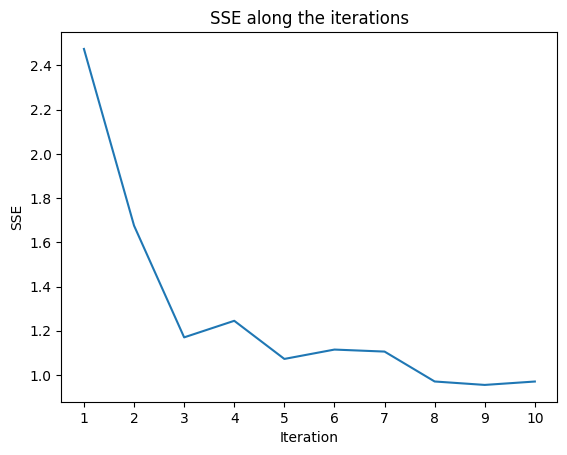

In [279]:
# your code here
# Função para plotar o histórico de SSEs a cada época
def plot_sse(sse_history):
    # Plotando o gráfico
    plt.plot(np.linspace(1, sse_history.size, sse_history.size), sse_history)
    # Ajustando os eixos
    plt.xlabel("Iteration")
    plt.ylabel("SSE")
    plt.xticks(np.linspace(1, sse_history.size, sse_history.size))
    # Configurando o título
    plt.title("SSE along the iterations")
    
    plt.show()

plot_sse(sse_history_nox)

Use the learn weights to make predictions for the test set, and evaluate the model using the root mean squared error (remember that the bias is the first column of the weight matrix)
- You can use the function you coded for your coursework, but feel free to use sklearn's `mean_squared_error()` here

In [280]:
# your code here
from sklearn.metrics import mean_squared_error

# Convertendo o dataframe de dados de teste para uma matriz
X_nox_test_array = X_nox_test.values
# Calculando as predições com base no w encontrado pela equação normal
prediction_nox_PI = X_nox_test_array @ w_nox_PI
# Calculando o erro
mean_squared_error(y_nox_test, prediction_nox_PI)

0.0052847200580245736

In [281]:
# Calculando as predições com base no w encontrado pelo SGD
prediction_nox_SGD = X_nox_test @ w_nox_SGD
# Calculando o erro
mean_squared_error(y_nox_test, prediction_nox_SGD)

0.007153331158116445

Repeat the same analysis for predicting `MEDV`

In [282]:
# your code here

# Salvando o vetor de targets pegando a coluna de MEDV e convertendo-a para float
y_medv = housing_clean["MEDV"]
y_medv = y_medv.astype(float)
# Salvando a matriz de dados excluindo a coluna de MEDV e convertendo os dados para float
X_medv = housing_clean.drop("MEDV", axis = 1)
X_medv = X_medv.astype(float)

# Separando os dados de treino e teste
X_medv_train, X_medv_test, y_medv_train, y_medv_test = train_test_split(X_medv, y_medv, train_size = 0.6)

In [283]:
# Calculando w com base na equação normal
w_medv_PI = linear_regression_PI(X_medv_train, y_medv_train)
w_medv_PI

0     3.186286
1    -1.193186
2     0.065849
3     0.120290
4     0.073770
5    -0.430014
6     1.226054
7    -0.067694
8    -0.631679
9     0.339936
10   -0.396873
11   -0.469070
12    0.325950
13   -1.216979
dtype: float64

In [284]:
# Calculando w com base no gradiente descendente estocástico
w_medv_SGD, sse_history_medv = linear_regression_SGD(X_medv_train, y_medv_train, 0.04, max_iter=10)
w_medv_SGD, sse_history_medv

(BIAS       2.180346
 CRIM      -0.439544
 ZN         0.118095
 INDUS      0.015187
 CHAS       0.158294
 NOX        0.095218
 RM         1.561107
 AGE        0.162009
 DIS        0.289628
 RAD       -0.062674
 TAX       -0.140987
 PTRATIO   -0.159966
 B          0.660149
 LSTAT     -0.908293
 Name: 342, dtype: float64,
 array([12.95825348, 11.96590704,  8.96966604,  7.57109541,  6.79092765,
         6.22309788,  5.839906  ,  5.54656916,  5.32121291,  4.97426287]))

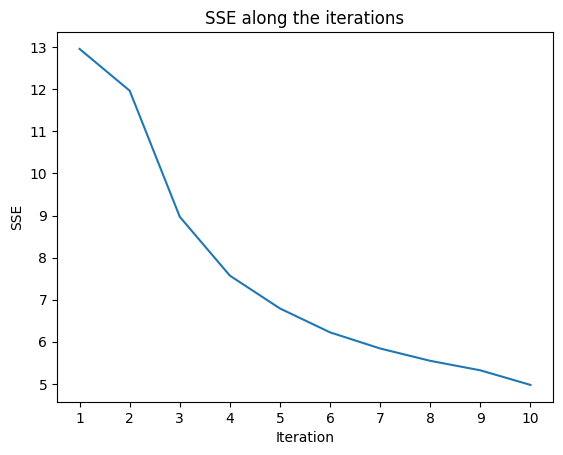

In [285]:
# Plotando o histórico do erro do SGD para o MEDV
plot_sse(sse_history_medv)

In [286]:
# Convertendo o dataframe de dados de teste para uma matriz
X_medv_test_array = X_medv_test.values
# Calculando as predições com base no w encontrado pela equação normal
prediction_medv_PI = X_medv_test_array @ w_medv_PI
# Calculando o erro
mean_squared_error(y_medv_test, prediction_medv_PI)

0.04879160607079392

In [287]:
# Calculando as predições com base no w encontrado pelo SGD
prediction_medv_SGD = X_medv_test @ w_medv_SGD
# Calculando o erro
mean_squared_error(y_medv_test, prediction_medv_SGD)

0.0709082153799968

## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



In [288]:
# your code here

## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

In [289]:
# your code here